In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [4]:
df=pd.read_csv('data_sets/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.shape

(150, 5)

In [8]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [10]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
df.species.replace(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), (1,2,3), inplace=True)

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<Axes: >

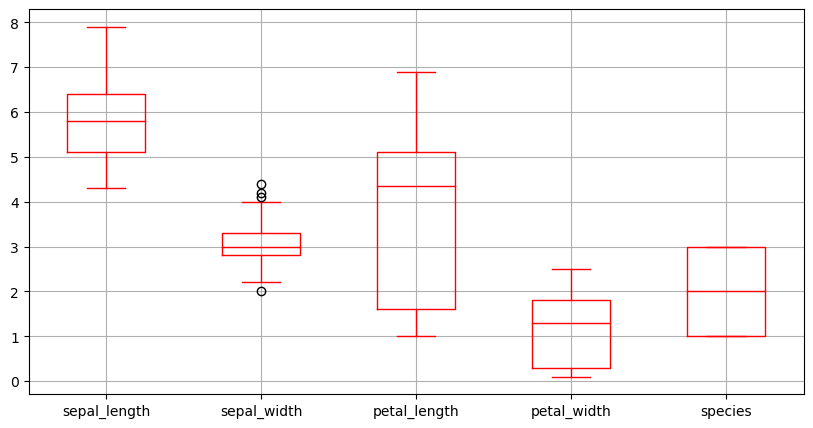

In [15]:
plt.figure(figsize = (10, 5))
df.boxplot(color='red')

In [16]:
df1=df[df.species==1]
df2=df[df.species==2]
df3=df[df.species==3]

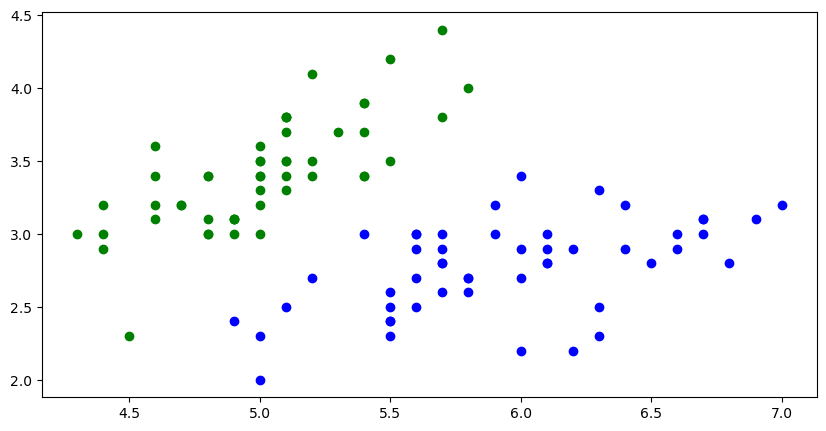

In [17]:
plt.figure(figsize = (10, 5))
plt.scatter(x=df1['sepal_length'],y=df1['sepal_width'], color='green')
plt.scatter(x=df2['sepal_length'],y=df2['sepal_width'], color='blue')

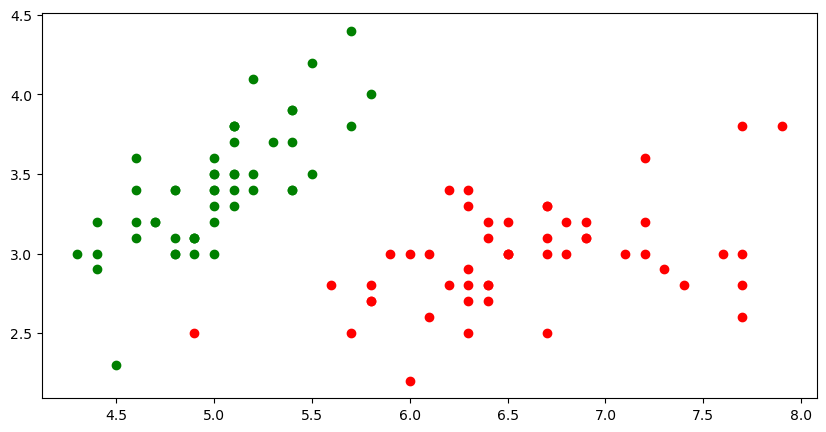

In [18]:
plt.figure(figsize = (10, 5))
plt.scatter(x=df1['sepal_length'],y=df1['sepal_width'], color='green')
plt.scatter(x=df3['sepal_length'],y=df3['sepal_width'], color='red')

In [19]:
x=df.drop(['species'],axis='columns')
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y=df.species
y.head()

0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int64

In [21]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [22]:
len(x_train)

120

In [23]:
len(x_test)

30

In [24]:
model = SVC() 

In [25]:
model.fit(x_train,y_train)

SVC()

In [26]:
model.score(x_test,y_test )


0.9666666666666667

In [33]:
x_predict=model.predict(x_test)
print("预测值：", x_predict)
print("真实值：", y_test.values)

预测值： [1 1 3 1 1 3 1 3 3 1 1 1 1 1 2 2 1 2 3 2 3 2 3 2 2 1 1 3 1 3]
真实值： [1 1 3 1 1 3 1 3 3 1 1 1 1 1 2 2 1 2 3 2 2 2 3 2 2 1 1 3 1 3]


In [36]:
import joblib
# 保存模型到文件
joblib.dump(model, 'model/svm_model_0.9666.pkl')

print("模型已保存为 svm_model.pkl")
"""

# 加载保存的模型
model = joblib.load('svm_model.pkl')

# 使用加载的模型进行预测
y_pred = model.predict(x_test)
print("预测结果：", y_pred)
"""

模型已保存为 svm_model.pkl


'\n\n# 加载保存的模型\nmodel = joblib.load(\'svm_model.pkl\')\n\n# 使用加载的模型进行预测\ny_pred = model.predict(x_test)\nprint("预测结果：", y_pred)\n'